In [3]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score

In [4]:
# Reading in data
ames_houses = pd.read_csv('../datasets/train.csv')

ames_house = pd.read_csv('../datasets/test.csv')

In [5]:
# looking through data

ames_houses.shape

(2051, 81)

In [6]:
# creating a dataframe with only the columns I care about

y = ames_houses['SalePrice']

features = ['Garage Cars',
            'Total Bsmt SF',
            '1st Flr SF',
            'Lot Area',
            'Lot Config',
            'Overall Qual',
            'Exter Qual',
            'Exter Cond', 
            'Central Air',
            'Gr Liv Area',
            'Full Bath',
            'Functional',
            'Garage Yr Blt',
           'Fireplaces',
           'Neighborhood',
            'Year Built',
            'TotRms AbvGrd',
           'Garage Area']

ames = ames_houses[features].copy()

In [7]:
ames.head()

,Garage Cars,Total Bsmt SF,1st Flr SF,Lot Area,Lot Config,Overall Qual,Exter Qual,Exter Cond,Central Air,Gr Liv Area,Full Bath,Functional,Garage Yr Blt,Fireplaces,Neighborhood,Year Built,TotRms AbvGrd,Garage Area
0,2.0,725.0,725,13517,CulDSac,6,Gd,TA,Y,1479,2,Typ,1976.0,0,Sawyer,1976,6,475.0
1,2.0,913.0,913,11492,CulDSac,7,Gd,TA,Y,2122,2,Typ,1997.0,1,SawyerW,1996,8,559.0
2,1.0,1057.0,1057,7922,Inside,5,TA,Gd,Y,1057,1,Typ,1953.0,0,NAmes,1953,5,246.0
3,2.0,384.0,744,9802,Inside,5,TA,TA,Y,1444,2,Typ,2007.0,0,Timber,2006,7,400.0
4,2.0,676.0,831,14235,Inside,6,TA,TA,Y,1445,2,Typ,1957.0,0,SawyerW,1900,6,484.0


In [8]:
# renaming columns:

#college.rename(columns={'Unnamed: 0': 'University'}, inplace = True)

In [9]:
ames.shape

(2051, 18)

In [10]:
ames.dtypes

Garage Cars      float64
Total Bsmt SF    float64
1st Flr SF         int64
Lot Area           int64
Lot Config        object
Overall Qual       int64
Exter Qual        object
Exter Cond        object
Central Air       object
Gr Liv Area        int64
Full Bath          int64
Functional        object
Garage Yr Blt    float64
Fireplaces         int64
Neighborhood      object
Year Built         int64
TotRms AbvGrd      int64
Garage Area      float64
dtype: object

In [11]:
ames.isnull().sum()

Garage Cars        1
Total Bsmt SF      1
1st Flr SF         0
Lot Area           0
Lot Config         0
Overall Qual       0
Exter Qual         0
Exter Cond         0
Central Air        0
Gr Liv Area        0
Full Bath          0
Functional         0
Garage Yr Blt    114
Fireplaces         0
Neighborhood       0
Year Built         0
TotRms AbvGrd      0
Garage Area        1
dtype: int64

In [12]:
ames['Garage Area'].value_counts()

0.0       113
440.0      70
576.0      69
484.0      52
528.0      46
         ... 
406.0       1
309.0       1
580.0       1
1184.0      1
557.0       1
Name: Garage Area, Length: 514, dtype: int64

In [13]:
ames_null = ames['Garage Area'].isnull()

ames[ames_null]

,Garage Cars,Total Bsmt SF,1st Flr SF,Lot Area,Lot Config,Overall Qual,Exter Qual,Exter Cond,Central Air,Gr Liv Area,Full Bath,Functional,Garage Yr Blt,Fireplaces,Neighborhood,Year Built,TotRms AbvGrd,Garage Area
1712,NaN,859.0,942,9060,Inside,5,TA,TA,Y,1828,2,Typ,NaN,0,IDOTRR,1923,6,NaN


In [14]:
ames['Garage Area'] = ames['Garage Area'].fillna(0)

In [15]:
ames.describe()

,Garage Cars,Total Bsmt SF,1st Flr SF,Lot Area,Overall Qual,Gr Liv Area,Full Bath,Garage Yr Blt,Fireplaces,Year Built,TotRms AbvGrd,Garage Area
count,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1.776585,1057.987805,1164.488055,10065.208191,6.112140,1499.330083,1.577279,1978.707796,0.590931,1971.708922,6.435885,473.440761
std,0.764537,449.410704,396.446923,6742.488909,1.426271,500.447829,0.549279,25.441094,0.638516,30.177889,1.560225,216.135102
min,0.000000,0.000000,334.000000,1300.000000,1.000000,334.000000,0.000000,1895.000000,0.000000,1872.000000,2.000000,0.000000
25%,1.000000,793.000000,879.500000,7500.000000,5.000000,1129.000000,1.000000,1961.000000,0.000000,1953.500000,5.000000,319.000000
50%,2.000000,994.500000,1093.000000,9430.000000,6.000000,1444.000000,2.000000,1980.000000,1.000000,1974.000000,6.000000,480.000000
75%,2.000000,1318.750000,1405.000000,11513.500000,7.000000,1728.500000,2.000000,2002.000000,1.000000,2001.000000,7.000000,576.000000
max,5.000000,6110.000000,5095.000000,159000.000000,10.000000,5642.000000,4.000000,2207.000000,4.000000,2010.000000,15.000000,1418.000000


In [16]:
ames.isnull().sum()

Garage Cars        1
Total Bsmt SF      1
1st Flr SF         0
Lot Area           0
Lot Config         0
Overall Qual       0
Exter Qual         0
Exter Cond         0
Central Air        0
Gr Liv Area        0
Full Bath          0
Functional         0
Garage Yr Blt    114
Fireplaces         0
Neighborhood       0
Year Built         0
TotRms AbvGrd      0
Garage Area        0
dtype: int64

In [17]:
ames['Neighborhood'].value_counts()

NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
SawyerW     87
NWAmes      87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
Timber      48
NoRidge     48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
Veenker     17
NPkVill     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [18]:
ames['Overall Qual'].value_counts()

5     563
6     506
7     431
8     250
4     159
9      77
3      29
10     23
2       9
1       4
Name: Overall Qual, dtype: int64

(array([115., 237., 404., 696., 336., 153.,  87.,  11.,   8.,   4.]),
 array([   0. ,  141.8,  283.6,  425.4,  567.2,  709. ,  850.8,  992.6,
        1134.4, 1276.2, 1418. ]),
 <a list of 10 Patch objects>)

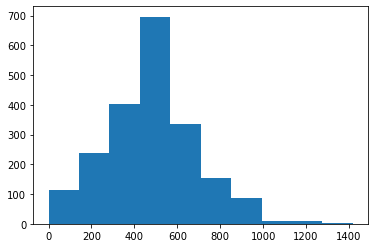

In [19]:
plt.hist(ames['Garage Area'])

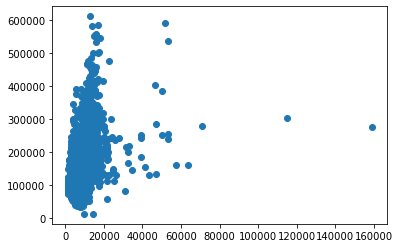

In [20]:
plt.scatter(ames['Lot Area'], y)

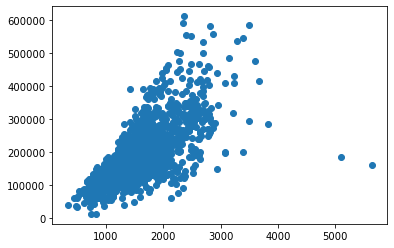

In [21]:
plt.scatter(ames['Gr Liv Area'], y)

In [22]:
ames.sort_values('Lot Area', ascending = False)

,Garage Cars,Total Bsmt SF,1st Flr SF,Lot Area,Lot Config,Overall Qual,Exter Qual,Exter Cond,Central Air,Gr Liv Area,Full Bath,Functional,Garage Yr Blt,Fireplaces,Neighborhood,Year Built,TotRms AbvGrd,Garage Area
471,2.0,1444.0,1444,159000,CulDSac,6,Gd,TA,Y,2144,2,Typ,1958.0,2,ClearCr,1958,7,389.0
694,2.0,1643.0,1824,115149,CulDSac,7,TA,TA,Y,1824,2,Typ,1971.0,2,ClearCr,1971,5,739.0
1854,2.0,1533.0,1533,70761,Inside,7,TA,TA,Y,1533,2,Typ,1975.0,2,ClearCr,1975,5,576.0
960,2.0,6110.0,4692,63887,Corner,10,Ex,TA,Y,5642,2,Typ,2008.0,3,Edwards,2008,12,1418.0
745,2.0,747.0,1687,57200,Inside,5,TA,TA,Y,1687,1,Min1,1966.0,2,Timber,1948,7,572.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,1.0,546.0,546,1484,Inside,4,TA,TA,Y,1092,1,Typ,1972.0,0,MeadowV,1972,5,253.0
787,0.0,546.0,546,1477,Inside,6,TA,Gd,Y,1092,2,Typ,NaN,0,MeadowV,1970,6,0.0
53,0.0,546.0,546,1476,Inside,4,TA,TA,Y,1092,1,Typ,NaN,0,MeadowV,1970,5,0.0
1544,0.0,630.0,630,1470,Inside,4,TA,TA,Y,630,1,Typ,NaN,0,MeadowV,1970,3,0.0


<BarContainer object of 2051 artists>

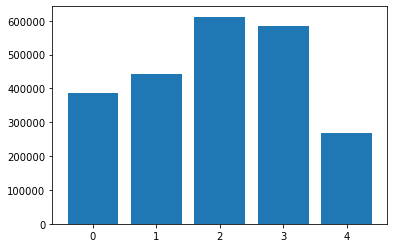

In [23]:
plt.bar(ames['Full Bath'], y)

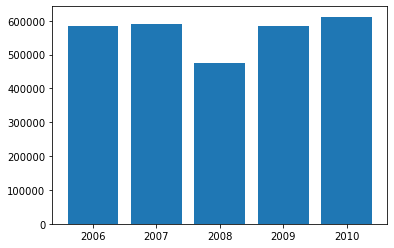

In [26]:
plt.bar(ames_houses['Yr Sold'], y);

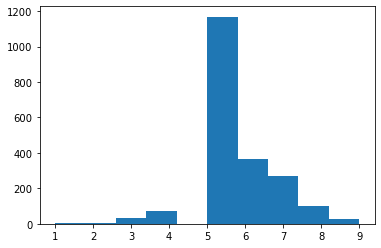

In [28]:
plt.hist(ames_houses['Overall Cond']);

In [29]:
color_dict = {1 : 'purple', 2 : 'red', 3 : 'blue', 4 : 'green', 5 : 'cyan',
                                  6 : 'orange', 7 : 'pink', 8 : 'yellow', 9 : 'salmon', 10 : 'magenta'}

In [30]:
ames['colors'] = ames['Overall Qual'].map(color_dict)

In [31]:
colors = ames['Overall Qual'].map(color_dict)

Text(0.5, 1.0, 'How House Quality Affects Sale Price')

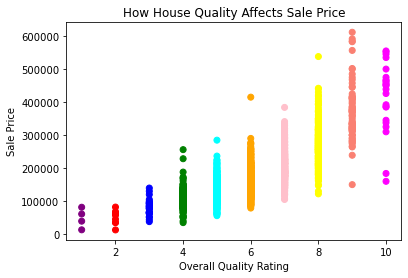

In [32]:
plt.scatter(ames['Overall Qual'], y, c = colors)

plt.xlabel('Overall Quality Rating')
plt.ylabel('Sale Price')

plt.title('How House Quality Affects Sale Price')

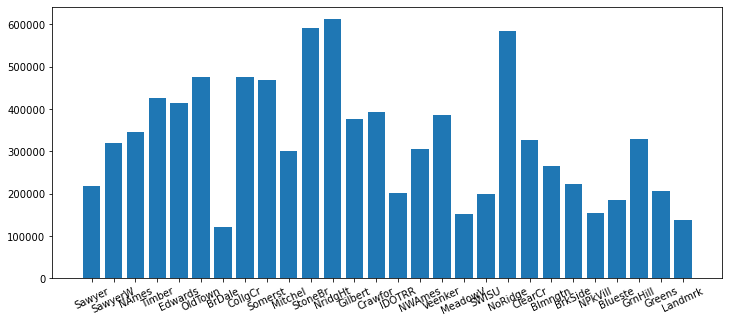

In [34]:
plt.figure(figsize = (12, 5))

plt.bar(ames['Neighborhood'], y)

plt.xticks(rotation = 25);

In [35]:
# Numerical X - making a baseline X from only the numerical columns that I've chosen

X = ames._get_numeric_data()

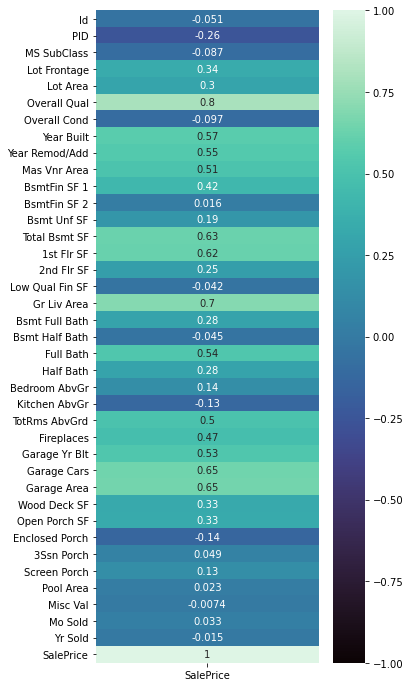

In [36]:
plt.figure(figsize=(5, 12))

sns.heatmap(ames_houses._get_numeric_data().corr()[['SalePrice']],
            vmin = -1,
            vmax = 1,
            annot = True,
            cmap = 'mako');

In [37]:
ames['overall_liv_area'] = ames['Overall Qual'] * ames['Gr Liv Area']

In [38]:
ames.head()

,Garage Cars,Total Bsmt SF,1st Flr SF,Lot Area,Lot Config,Overall Qual,Exter Qual,Exter Cond,Central Air,Gr Liv Area,Full Bath,Functional,Garage Yr Blt,Fireplaces,Neighborhood,Year Built,TotRms AbvGrd,Garage Area,colors,overall_liv_area
0,2.0,725.0,725,13517,CulDSac,6,Gd,TA,Y,1479,2,Typ,1976.0,0,Sawyer,1976,6,475.0,orange,8874
1,2.0,913.0,913,11492,CulDSac,7,Gd,TA,Y,2122,2,Typ,1997.0,1,SawyerW,1996,8,559.0,pink,14854
2,1.0,1057.0,1057,7922,Inside,5,TA,Gd,Y,1057,1,Typ,1953.0,0,NAmes,1953,5,246.0,cyan,5285
3,2.0,384.0,744,9802,Inside,5,TA,TA,Y,1444,2,Typ,2007.0,0,Timber,2006,7,400.0,cyan,7220
4,2.0,676.0,831,14235,Inside,6,TA,TA,Y,1445,2,Typ,1957.0,0,SawyerW,1900,6,484.0,orange,8670


In [49]:
X['Garage Yr Blt'] = X['Garage Yr Blt'].fillna(0)

X['Garage Cars'] = X['Garage Yr Blt'].fillna(0)

X['Total Bsmt SF'] = X['Garage Yr Blt'].fillna(0)

In [50]:
# Creating the model: splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 142)

In [53]:
# making a model and fitting the model

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [55]:
# getting cross value score for model

cross_val_score(lr, X, y).mean()

# not terrible, but could certainly be better. Moving forward with the baseline model.

0.7879765002754742

In [56]:
# getting r2 score for training data

lr.score(X_train, y_train)

0.7807153674568341

In [57]:
# getting r2 score for testing data

lr.score(X_test, y_test)

0.764457296433601

In [58]:
# Getting y prediction values

y_preds = lr.predict(X)

In [59]:
# Calculating RMSE

RMSE = np.sqrt(metrics.mean_squared_error(y, y_preds))

RMSE

37437.58952933915

This will be my baseline RMSE, and I'll hope to improve on that with feature engineering in my Making Submissions notebook.